# Accident Analysis by U.S. State


**Library Imports**

> Import essential libraries for data manipulation (pandas, dask), data visualization (matplotlib, seaborn), and efficient handling of large datasets.


In [1]:
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns

**Mount Google Drive and Load Dataset**

>Mount Google Drive to access the dataset, extract the ZIP file, and load the CSV file using dask for scalable processing. The data is then converted to a standard pandas DataFrame for further analysis.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import zipfile

with zipfile.ZipFile("/content/drive/MyDrive/Data8/Data8.zip", 'r') as zip_ref:
    zip_ref.extractall("/content")

df_dask = dd.read_csv('/content/Data8.csv')
df = df_dask.compute()

Mounted at /content/drive


**Datetime Conversion and Filtering by Year**

>Convert the Start_Time column to datetime format and extract temporal features (hour, weekday, month, year). Filter the dataset to include only accident data from 2020 to 2023.

In [3]:
df['Start_Time'] = dd.to_datetime(df['Start_Time'], errors='coerce')
df['Hour'] = df['Start_Time'].dt.hour
df['Weekday'] = df['Start_Time'].dt.weekday
df['Month'] = df['Start_Time'].dt.month
df['Year'] = df['Start_Time'].dt.year

df= df[(df['Year'] >= 2020) & (df['Year'] <= 2023)]

**1. General Accident Count by State**

> Visualizes the total number of accidents recorded in each U.S. state, sorted from highest to lowest.



<ipython-input-5-c14f72c1da6e>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='Accident_Count', data=state_counts_df, palette='Blues_d')


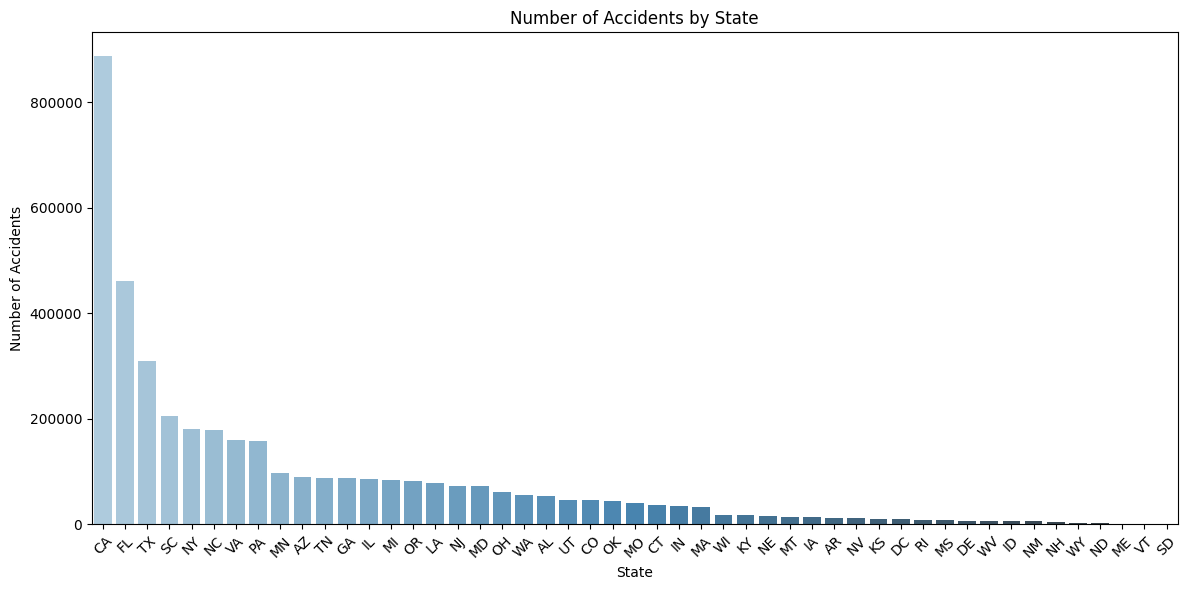

In [ ]:
# Count accidents by state and sort in descending order
state_counts = df['State'].value_counts().sort_values(ascending=False)

# Convert to DataFrame for visualization
state_counts_df = state_counts.reset_index()
state_counts_df.columns = ['State', 'Accident_Count']

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Accident_Count', data=state_counts_df, palette='Blues_d')
plt.title("Number of Accidents by State")
plt.xlabel("State")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**2. Top 10 States with Highest Accident Counts**




<ipython-input-6-64927ddce84f>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='State', y='Accidents', data=df_top, palette='Blues_d')


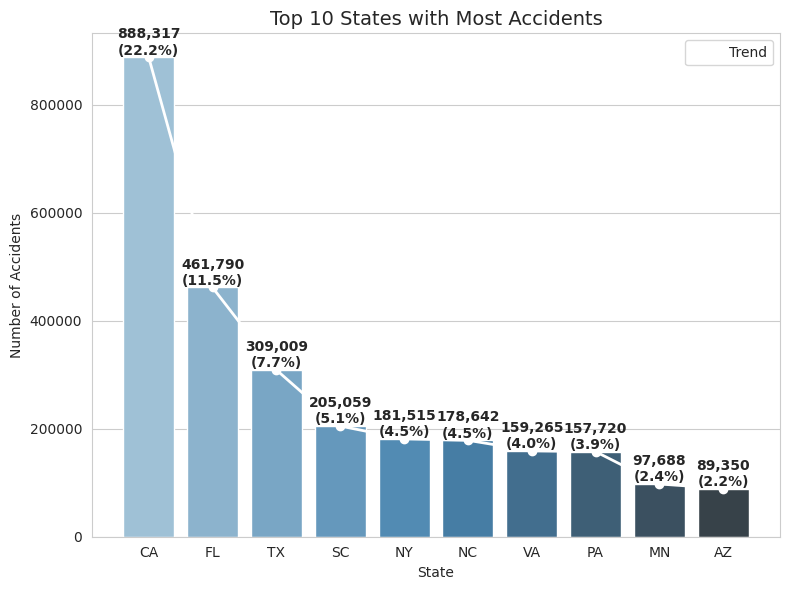

In [ ]:
# Get top 10 states by accident count
state_counts = df['State'].value_counts().sort_values(ascending=False).head(10)

# Calculate percentage of total accidents
total_top = df['State'].value_counts().sum()
state_percent = round(100 * state_counts / total_top, 1)

# Create DataFrame for visualization
df_top = pd.DataFrame({
    'State': state_counts.index,
    'Accidents': state_counts.values,
    'Percent': state_percent.values
})

# Plot with annotations
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
barplot = sns.barplot(x='State', y='Accidents', data=df_top, palette='Blues_d')

# Add value/percentage labels
for i, row in df_top.iterrows():
    barplot.text(i, row['Accidents'] + 5000, f"{row['Accidents']:,}\n({row['Percent']}%)",
                 ha='center', fontsize=10, weight='bold')

# Add trend line
plt.plot(df_top['State'], df_top['Accidents'], color='white', marker='o', linewidth=2, label='Trend')

plt.title("Top 10 States with Most Accidents", fontsize=14)
plt.xlabel("State")
plt.ylabel("Number of Accidents")
plt.legend()
plt.tight_layout()
plt.show()

**3. Top 10 States with Lowest Accident Counts**

<ipython-input-7-feb427fee685>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='State', y='Accidents', data=df_bottom, palette='Greens_d')


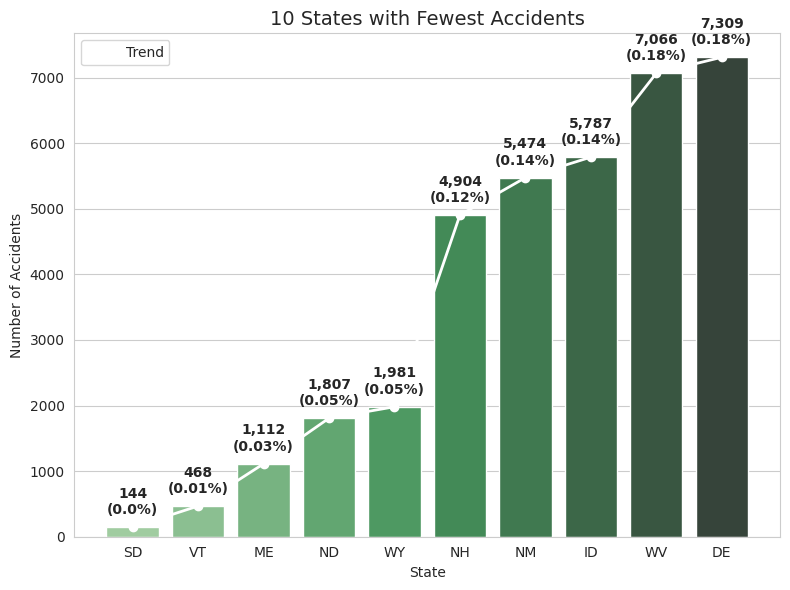

In [ ]:
# Sort states by accident count (ascending) and take bottom 10
state_counts = df['State'].value_counts().sort_values().head(10)

# Calculate percentages
total_accidents = df['State'].value_counts().sum()
state_percent = round(100 * state_counts / total_accidents, 2)

# Create DataFrame
df_bottom = pd.DataFrame({
    'State': state_counts.index,
    'Accidents': state_counts.values,
    'Percent': state_percent.values
})

# Plot with annotations
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
barplot = sns.barplot(x='State', y='Accidents', data=df_bottom, palette='Greens_d')

# Add value/percentage labels
for i, row in df_bottom.iterrows():
    barplot.text(i, row['Accidents'] + 200, f"{row['Accidents']:,}\n({row['Percent']}%)",
                 ha='center', fontsize=10, weight='bold')

# Add trend line
plt.plot(df_bottom['State'], df_bottom['Accidents'], color='white', marker='o', linewidth=2, label='Trend')

plt.title("10 States with Fewest Accidents", fontsize=14)
plt.xlabel("State")
plt.ylabel("Number of Accidents")
plt.legend()
plt.tight_layout()
plt.show()

**3. U.S. Heatmap by Accident Frequency**

In [ ]:
import plotly.express as px

# Prepare state accident counts
state_counts = df['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Accident_Count']

# Create choropleth map
fig = px.choropleth(
    state_counts,
    locations='State',          # State abbreviations
    locationmode='USA-states',  # Geographic resolution
    color='Accident_Count',     # Color intensity scale
    scope='usa',               # Map scope (USA)
    color_continuous_scale='Reds',  # Color gradient
    title='Road Accidents by State'
)

fig.show()


**4. Top 10 Cities by Accident Count**

<ipython-input-9-c8377e00c4a4>:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




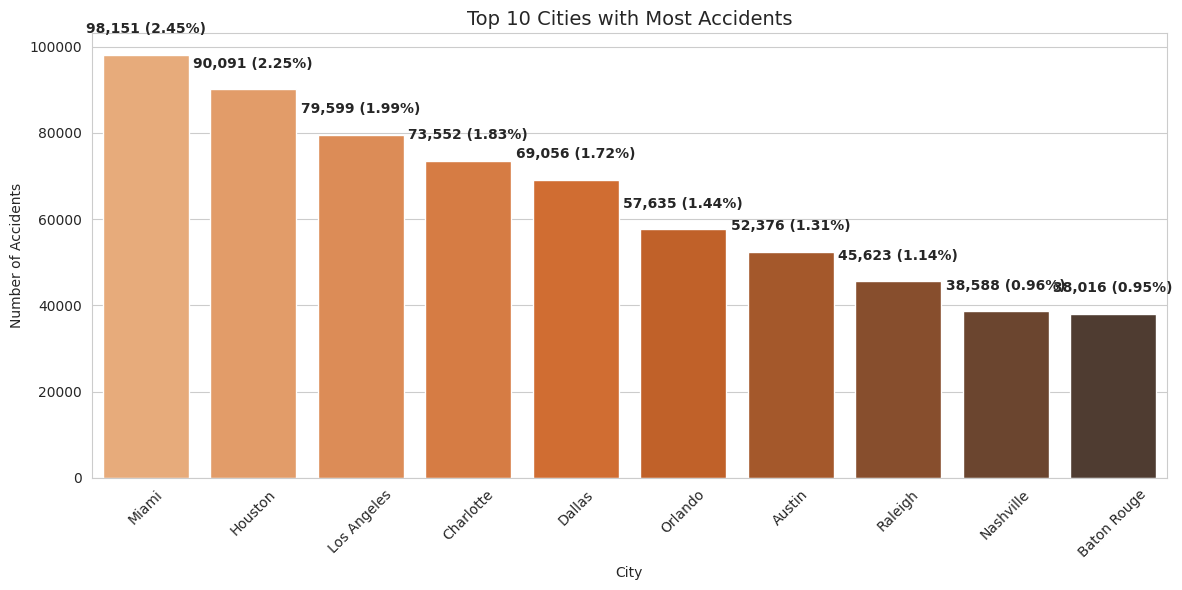

In [ ]:
# Get city accident counts (top 10)
city_counts = df['City'].value_counts().sort_values(ascending=False).head(10)

# Calculate percentages
total_accidents = df.shape[0]
city_percent = round(100 * city_counts / total_accidents, 2)

# Prepare DataFrame
df_city = pd.DataFrame({
    'City': city_counts.index,
    'Accidents': city_counts.values,
    'Percent': city_percent.values
})

# Create visualization
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
barplot = sns.barplot(
    x='City',
    y='Accidents',
    data=df_city,
    palette='Oranges_d'  # Orange gradient
)

# Add value labels
for i, row in df_city.iterrows():
    barplot.text(
        i,
        row['Accidents'] + 5000,
        f"{row['Accidents']:,} ({row['Percent']}%)",
        ha='center',
        fontsize=10,
        weight='bold'
    )

plt.title("Top 10 Cities with Most Accidents", fontsize=14)
plt.xlabel("City")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)  # Improve label readability
plt.tight_layout()
plt.show()

**5. Geographic Distribution of Accidents in Top Cities**



In [ ]:
# Prepare geospatial data
df_geo = df[['City', 'Start_Lat', 'Start_Lng']].dropna()

# Sample data for performance (10% of records)
df_geo_sample = df_geo.sample(frac=0.1)

# Identify top cities
top_cities = df_geo_sample['City'].value_counts().head(10).index.tolist()
df_top_cities = df_geo_sample[df_geo_sample['City'].isin(top_cities)]

# Create interactive map
fig = px.scatter_mapbox(
    df_top_cities,
    lat="Start_Lat",          # Latitude column
    lon="Start_Lng",          # Longitude column
    hover_name="City",        # Display on hover
    zoom=3,                   # Initial zoom level
    color="City",             # Color by city
    title="Accident Hotspots in Top Cities"
)

# Style the map
fig.update_layout(mapbox_style="open-street-map")  # Base map style
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig.show()


**6. Annual Accident Distribution (Percentage)**


<ipython-input-11-0b3347b85cea>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




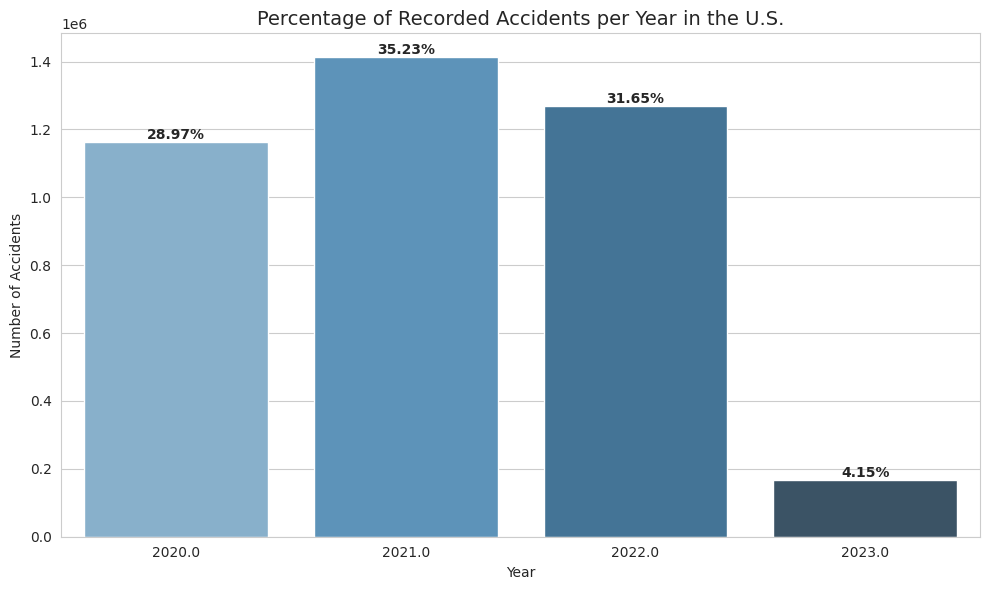

In [ ]:
# Calculate accidents per year
accidents_per_year = df['Year'].value_counts().sort_index()

# Calculate percentages
total_accidents = len(df)
accident_percentages = (accidents_per_year / total_accidents) * 100

# Create a DataFrame for plotting
df_year = pd.DataFrame({
    'Year': accidents_per_year.index,
    'Accidents': accidents_per_year.values,
    'Percentage': accident_percentages.values
})

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
barplot = sns.barplot(x='Year', y='Accidents', data=df_year, palette='Blues_d')

# Add percentage labels on top of each bar
for i, row in df_year.iterrows():
    barplot.text(i, row['Accidents'] , f"{row['Percentage']:.2f}%", ha='center', va='bottom', fontsize=10, weight='bold')

plt.title('Percentage of Recorded Accidents per Year in the U.S.', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()


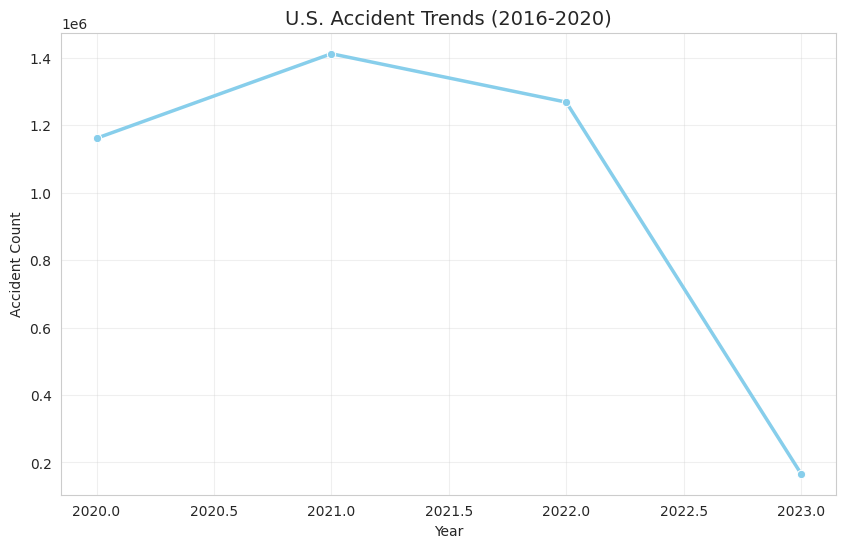

In [ ]:
# Prepare yearly accident data
df_year = pd.DataFrame({
    'Year': df['Year'].value_counts().sort_index().index,
    'Accidents': df['Year'].value_counts().sort_index().values
})

# Create trend line plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.lineplot(x='Year', y='Accidents', data=df_year,
             marker='o', color='skyblue', linewidth=2.5)

plt.title('U.S. Accident Trends (2016-2020)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Accident Count')
plt.grid(True, alpha=0.3)
plt.show()


<ipython-input-13-f36738b49c2d>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




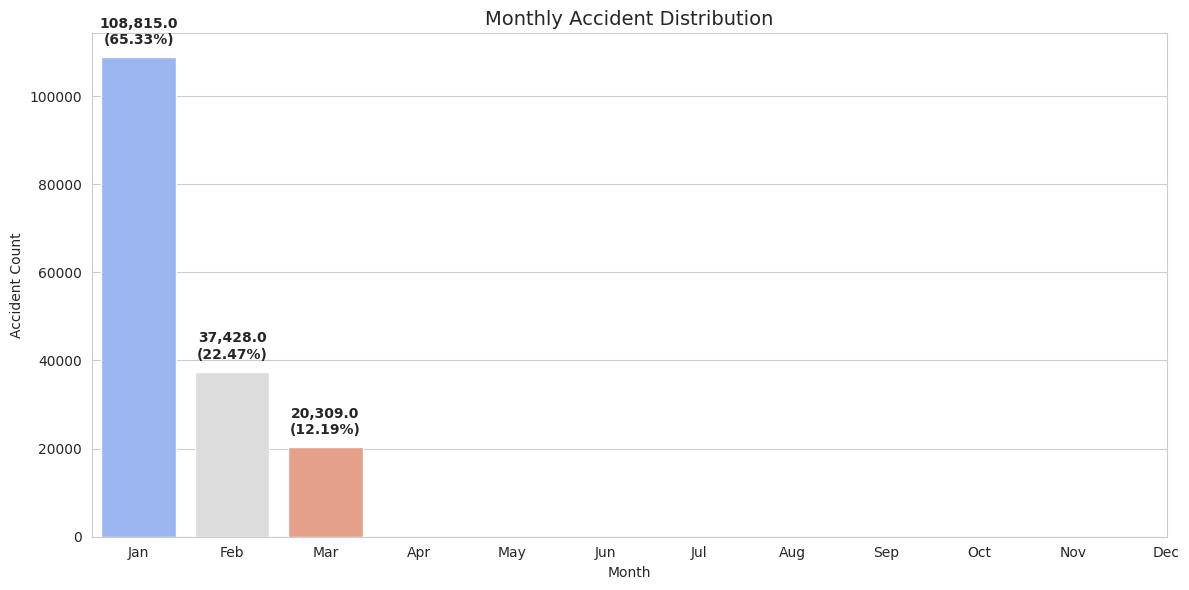

In [ ]:
# Calculate monthly statistics
df1=df[(df['Year']==2023)]
monthly_counts = df1['Month'].value_counts().sort_index()
monthly_percent = round(100 * monthly_counts / monthly_counts.sum(), 2)

# Prepare DataFrame
df_month = pd.DataFrame({
    'Month': monthly_counts.index,
    'Accidents': monthly_counts.values,
    'Percent': monthly_percent.values
})

# Generate visualization
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
barplot = sns.barplot(x='Month', y='Accidents', data=df_month, palette='coolwarm')

# Add value labels
for i, row in df_month.iterrows():
    barplot.text(i, row['Accidents'] + 3000,
                f"{row['Accidents']:,}\n({row['Percent']}%)",
                ha='center', fontsize=10, weight='bold')

# Format x-axis
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(12), labels=month_labels)

plt.title('Monthly Accident Distribution', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Accident Count')
plt.tight_layout()
plt.show()


In [4]:
df= df[(df['Year'] >= 2020) & (df['Year'] <=2022)]

**8. Monthly Accident Distribution**

<ipython-input-15-0b6906a1f6cd>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




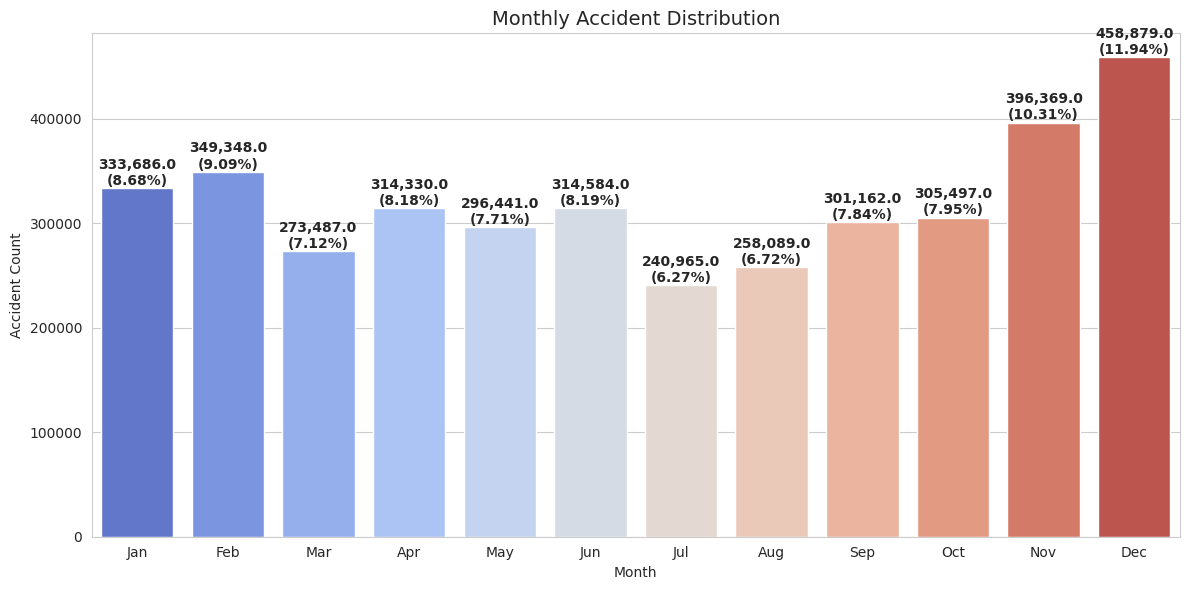

In [ ]:
# Calculate monthly statistics
monthly_counts = df['Month'].value_counts().sort_index()
monthly_percent = round(100 * monthly_counts / monthly_counts.sum(), 2)

# Prepare DataFrame
df_month = pd.DataFrame({
    'Month': monthly_counts.index,
    'Accidents': monthly_counts.values,
    'Percent': monthly_percent.values
})

# Generate visualization
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
barplot = sns.barplot(x='Month', y='Accidents', data=df_month, palette='coolwarm')

# Add value labels
for i, row in df_month.iterrows():
    barplot.text(i, row['Accidents'] + 3000,
                f"{row['Accidents']:,}\n({row['Percent']}%)",
                ha='center', fontsize=10, weight='bold')

# Format x-axis
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(12), labels=month_labels)

plt.title('Monthly Accident Distribution', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Accident Count')
plt.tight_layout()
plt.show()


**10. Weekly Accident Patterns**

<ipython-input-16-5647116c70d4>:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




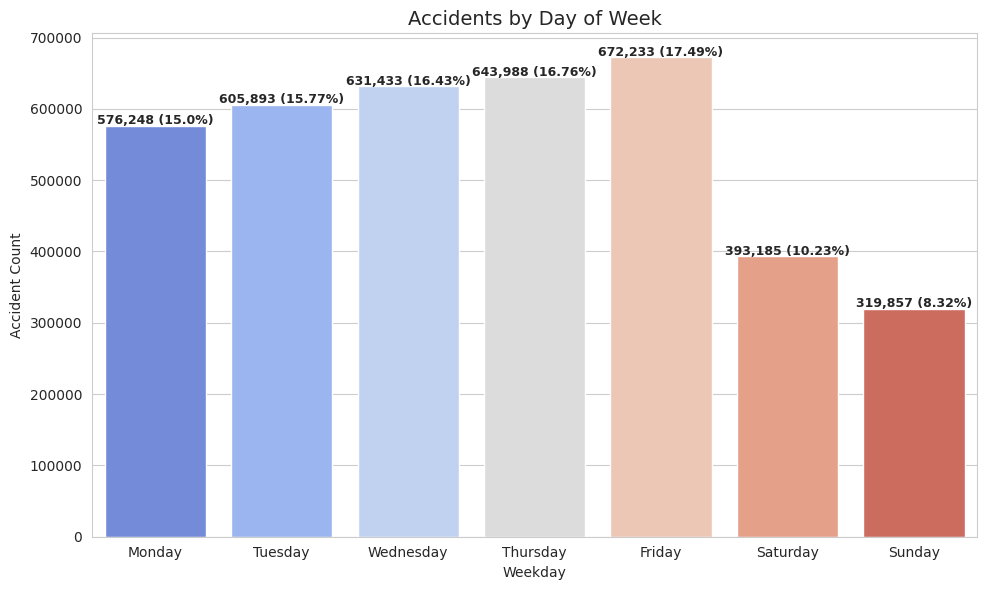

In [ ]:
# Prepare weekday data
weekday_counts = df['Weekday'].value_counts().sort_index()
weekday_percent = round(100 * weekday_counts / weekday_counts.sum(), 2)

# Create DataFrame with French day names
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
        'Friday', 'Saturday', 'Sunday']
df_weekday = pd.DataFrame({
    'Weekday': weekday_counts.index,
    'Accidents': weekday_counts.values,
    'Percent': weekday_percent.values,
    'Day': days
})

# Generate plot
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
barplot = sns.barplot(x='Day', y='Accidents', data=df_weekday, palette='coolwarm')

# Add annotations
for i, row in df_weekday.iterrows():
    barplot.text(i, row['Accidents'] + 2000,
                f"{row['Accidents']:,} ({row['Percent']}%)",
                ha='center', fontsize=9, weight='bold')

plt.title('Accidents by Day of Week', fontsize=14)
plt.xlabel('Weekday')
plt.ylabel('Accident Count')
plt.tight_layout()
plt.show()

**11. Hourly Accident Distribution**

<ipython-input-17-490b3207110e>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




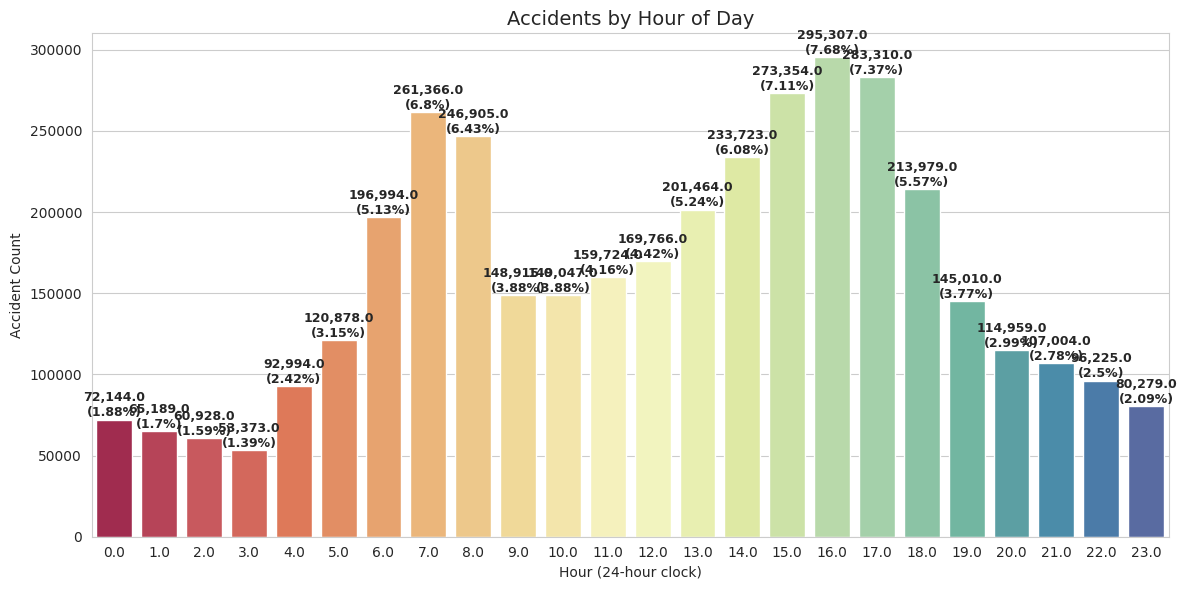

In [ ]:
# Calculate hourly statistics
hour_counts = df['Hour'].value_counts().sort_index()
hour_percent = round(100 * hour_counts / hour_counts.sum(), 2)

# Prepare DataFrame
df_hour = pd.DataFrame({
    'Hour': hour_counts.index,
    'Accidents': hour_counts.values,
    'Percent': hour_percent.values
})

# Create visualization
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
barplot = sns.barplot(x='Hour', y='Accidents', data=df_hour, palette='Spectral')

# Add value labels
for i, row in df_hour.iterrows():
    barplot.text(i, row['Accidents'] + 2000,
                f"{row['Accidents']:,}\n({row['Percent']}%)",
                ha='center', fontsize=9, weight='bold')

plt.title('Accidents by Hour of Day', fontsize=14)
plt.xlabel('Hour (24-hour clock)')
plt.ylabel('Accident Count')
plt.xticks(ticks=range(24))
plt.tight_layout()
plt.show()



 **Accidents by Weather Condition**

In [ ]:
def simplify_weather_condition(condition):
    condition = condition.lower()

    if 'tornado' in condition:
        return 'Extreme'
    elif 'thunder' in condition or 't-storm' in condition or 'hail' in condition:
        return 'Thunderstorm'
    elif ('snow' in condition or 'sleet' in condition or
          'wintry mix' in condition or 'ice pellets' in condition or
          'snow grains' in condition or 'blowing snow' in condition):
        return 'Snow'
    elif 'freezing rain' in condition or 'freezing drizzle' in condition:
        return 'Freezing Rain'
    elif 'rain' in condition or 'shower' in condition:
        return 'Rain'
    elif 'drizzle' in condition:
        return 'Drizzle'
    elif ('fog' in condition or 'mist' in condition or
          'haze' in condition or 'partial fog' in condition or
          'shallow fog' in condition or 'patches of fog' in condition):
        return 'Fog/Haze'
    elif ('dust' in condition or 'sand' in condition or
          'smoke' in condition):
        return 'Dust/Smoke'
    elif ('wind' in condition or 'windy' in condition or
          'squall' in condition):
        return 'Windy'
    elif 'clear' in condition or 'fair' in condition:
        return 'Clear'
    elif 'cloud' in condition or 'overcast' in condition:
        return 'Cloudy'
    elif 'n/a' in condition:
        return 'Unknown'
    else:
        return 'Other'



# Application
df['Weather_Condition'] = df['Weather_Condition'].apply(simplify_weather_condition)

<ipython-input-18-b68068438883>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




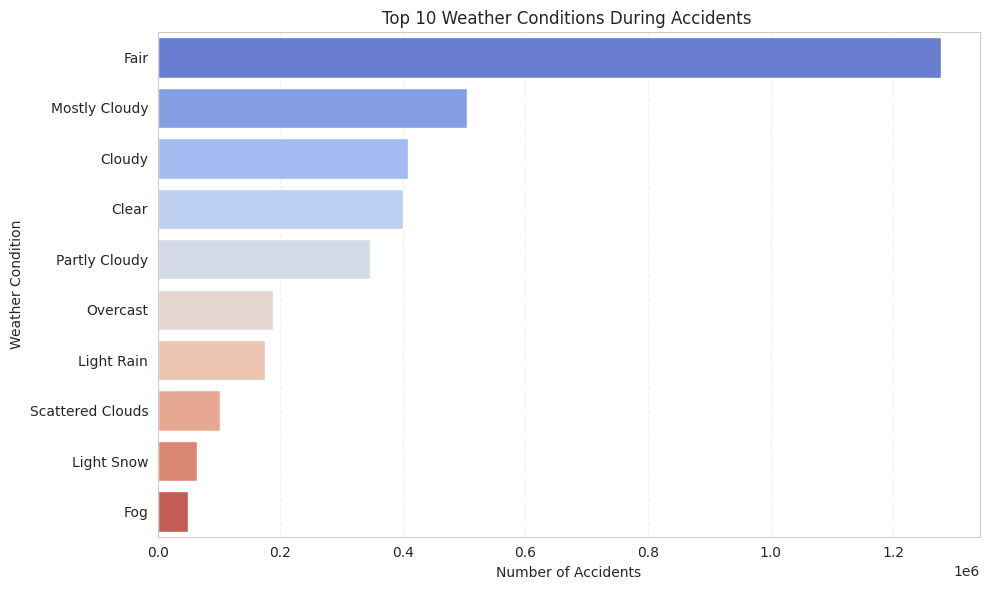

In [ ]:
def plot_weather_conditions(df, top_n=10):
    top_weather = df['Weather_Condition'].value_counts().nlargest(top_n)

    plt.figure(figsize=(10, 6))
    sns.barplot(y=top_weather.index, x=top_weather.values, palette='coolwarm')
    plt.title(f'Top {top_n} Weather Conditions During Accidents ')
    plt.xlabel('Number of Accidents')
    plt.ylabel('Weather Condition')
    plt.grid(axis='x', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()
plot_weather_conditions(df, top_n=10)

**12. Accident Severity Analysis**

A. Annual Severity Trends (Line Plot)



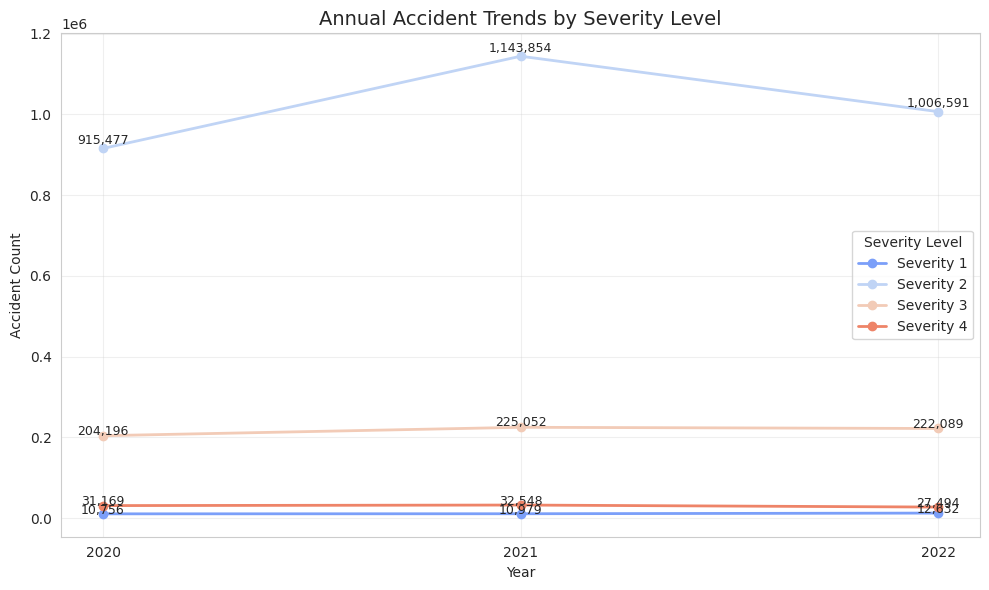

In [ ]:
# Group by year and severity
grouped = df.groupby(['Year', 'Severity']).size().reset_index(name='Accident_Count')

# Pivot for visualization
pivot_df = grouped.pivot(index='Year', columns='Severity', values='Accident_Count').fillna(0)

# Create line plot
plt.figure(figsize=(10, 6))
palette = sns.color_palette('coolwarm', n_colors=4)
colors = ['#6baed6', '#4292c6', '#2171b5', '#084594']  # Blue gradient
labels = ['Severity 1', 'Severity 2', 'Severity 3', 'Severity 4']

for i, severity in enumerate(sorted(pivot_df.columns)):
    y = pivot_df[severity]
    plt.plot(pivot_df.index, y,
            marker='o',
            linewidth=2,
            color=palette[i],
            label=labels[i])

    # Add value annotations
    for x, val in zip(pivot_df.index, y):
        plt.text(x, val + max(y)*0.01, f"{int(val):,}",
                ha='center',
                fontsize=9)

# Formatting
plt.title("Annual Accident Trends by Severity Level", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Accident Count")
plt.legend(title="Severity Level")
plt.grid(True, alpha=0.3)
plt.xticks(pivot_df.index)
plt.tight_layout()
plt.show()

B. Severity Distribution (Stacked Bar Chart)

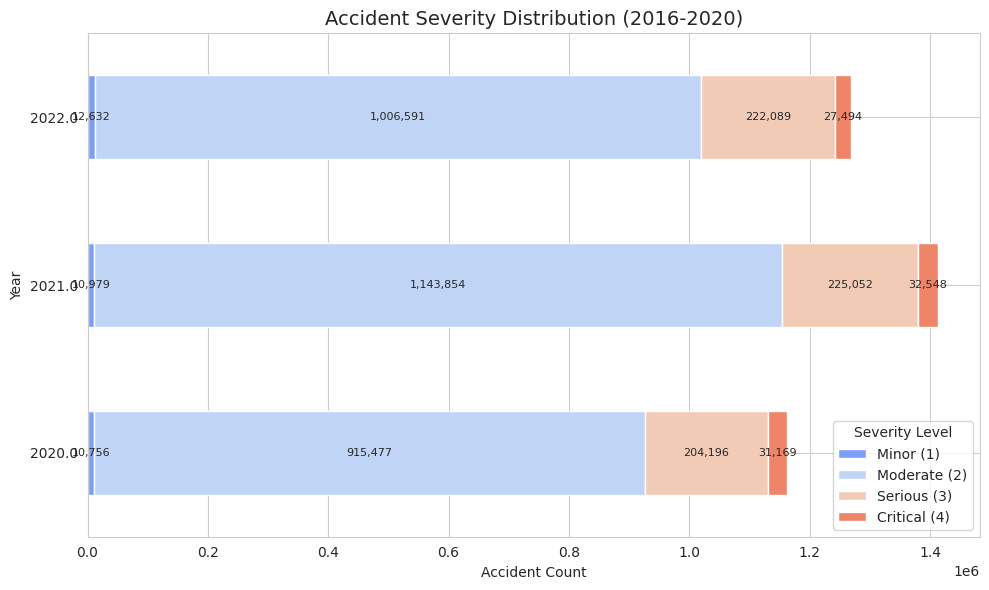

In [ ]:
# Prepare pivoted data
pivot_df = pivot_df[[1, 2, 3, 4]]  # Ensure severity order

# Create color palette
palette = sns.color_palette('coolwarm', n_colors=4)

# Generate stacked bar plot
ax = pivot_df.plot(kind='barh',
                  stacked=True,
                  figsize=(10, 6),
                  color=palette)

# Add value annotations
for i, year in enumerate(pivot_df.index):
    left = 0
    for severity in pivot_df.columns:
        width = pivot_df.loc[year, severity]
        if width > 10000:  # Threshold for readability
            ax.text(left + width/2, i, f'{width:,}',
                   va='center',
                   ha='center',
                   fontsize=8)
        left += width

# Formatting
plt.xlabel("Accident Count")
plt.ylabel("Year")
plt.legend(title="Severity Level",
          labels=['Minor (1)', 'Moderate (2)', 'Serious (3)', 'Critical (4)'])
plt.tight_layout()
plt.show()

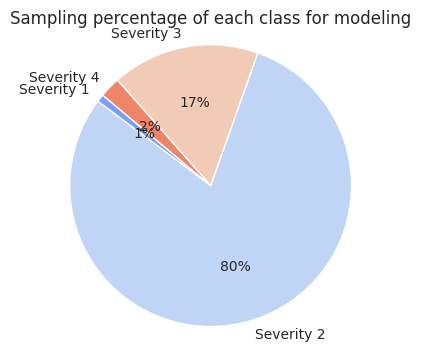

In [ ]:
import dask.dataframe as dd
import matplotlib.pyplot as plt

palette = sns.color_palette('coolwarm', n_colors=4)


severity_counts = df['Severity'].value_counts().sort_index()

severity_percentages = (severity_counts / severity_counts.sum()) * 100

# 4. Tracer le diagramme en camembert
labels = [f"Severity {int(s)}" for s in severity_percentages.index]
sizes = severity_percentages.values
colors = ['#6baed6', '#4292c6', '#2171b5', '#084594']

plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.0f%%', startangle=140, colors=palette)
plt.title('Sampling percentage of each class for modeling')
plt.axis('equal')  # Cercle parfait
plt.show()


<ipython-input-6-d0bf6a741100>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Severity', y='Accidents', data=df_severity, palette='Blues_d')


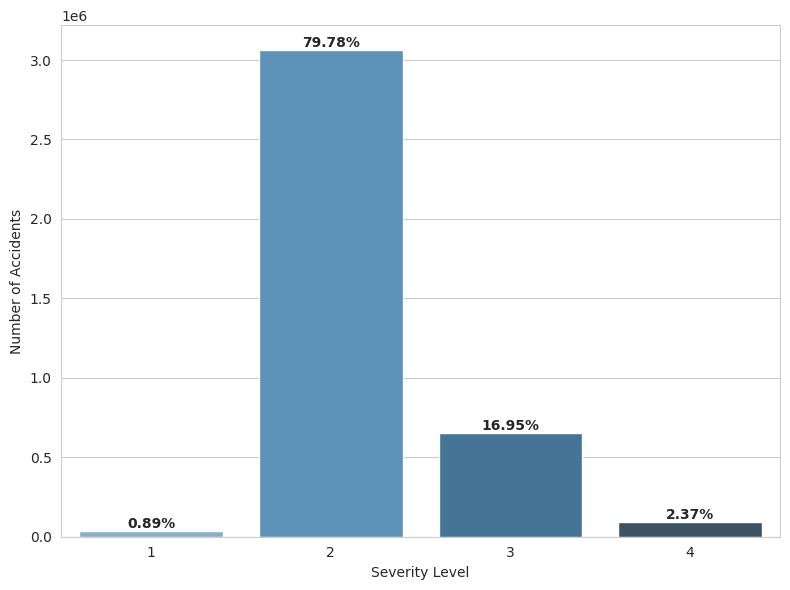

In [6]:
# Compter les accidents par gravité
accidents_by_severity = df['Severity'].value_counts().sort_index()

# Calculer les pourcentages
total_accidents = len(df)
severity_percentages = (accidents_by_severity / total_accidents) * 100

# Créer un DataFrame pour l'affichage
df_severity = pd.DataFrame({
    'Severity': accidents_by_severity.index.astype(str),
    'Accidents': accidents_by_severity.values,
    'Percentage': severity_percentages.values
})

# Tracer le graphique
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
barplot = sns.barplot(x='Severity', y='Accidents', data=df_severity, palette='Blues_d')

# Ajouter les pourcentages au-dessus des barres
for i, row in df_severity.iterrows():
    barplot.text(i, row['Accidents'], f"{row['Percentage']:.2f}%", ha='center', va='bottom', fontsize=10, weight='bold')

plt.xlabel('Severity Level')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

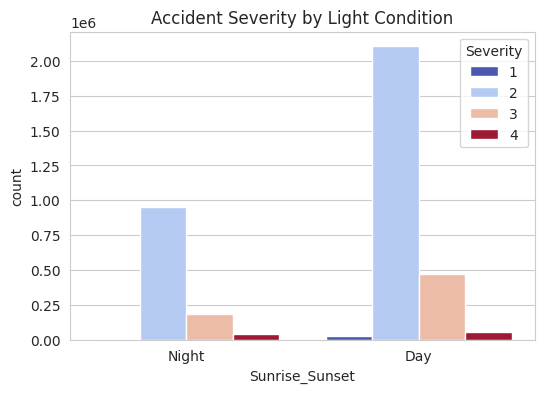

In [ ]:
# Light conditions (Sunrise_Sunset) vs Severity
plt.figure(figsize=(6,4))
# Reset the index of the DataFrame to ensure unique index values
sns.countplot(x='Sunrise_Sunset', data=df.reset_index(), hue='Severity', palette='Blues_d')
plt.title("Accident Severity by Light Condition")
plt.show()



In [ ]:
import matplotlib.patches as mpatches
import geopandas as gp
import folium

In [ ]:
# Filter the DataFrame for severity levels 2 and 4
severity_1_df = df[df['Severity'] == 1]
severity_2_df = df[df['Severity'] == 2]
severity_3_df = df[df['Severity'] == 3]
severity_4_df = df[df['Severity'] == 4]

# Print the results
print(f"Number of accidents with severity 1: {severity_1_df.shape[0]}")
print(f"Number of accidents with severity 2: {severity_2_df.shape[0]}")
print(f"Number of accidents with severity 3: {severity_3_df.shape[0]}")
print(f"Number of accidents with severity 4: {severity_4_df.shape[0]}")

Number of accidents with severity 1: 34367
Number of accidents with severity 2: 3065922
Number of accidents with severity 3: 651337
Number of accidents with severity 4: 91211


In [ ]:
# Filtrage des données par année
df_2020 = df[df['Year']== 2020]
df_2021 = df[df['Year']== 2021]
df_2022 = df[df['Year']== 2022]

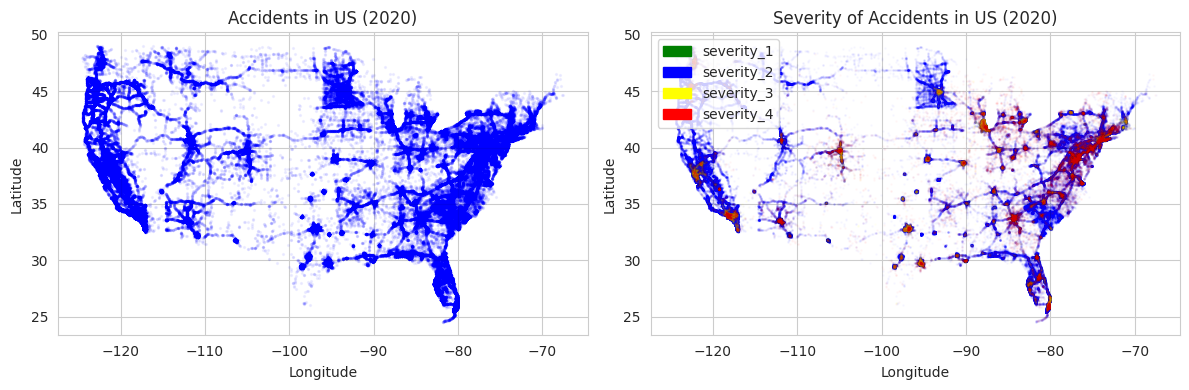

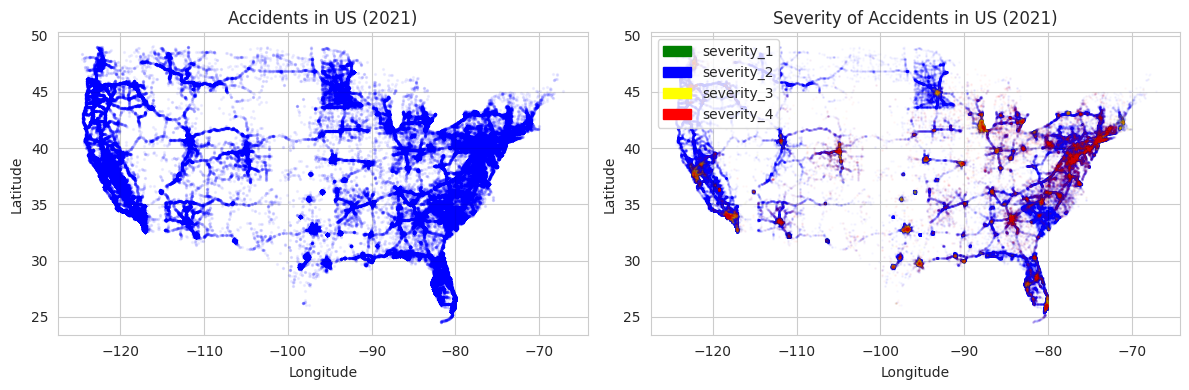

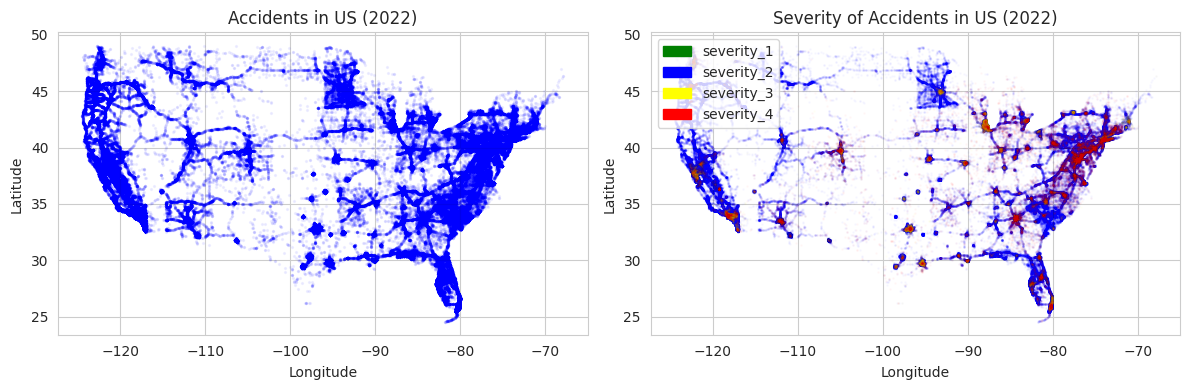

In [ ]:
# Fonction pour tracer les données d'une année
def plot_accidents_by_year(df_year, year):
    severity_1_df = df_year[df_year['Severity'] == 1]
    severity_2_df = df_year[df_year['Severity'] == 2]
    severity_3_df = df_year[df_year['Severity'] == 3]
    severity_4_df = df_year[df_year['Severity'] == 4]

    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.set_figheight(4)
    fig.set_figwidth(12)

    # Plot global
    axes[0].scatter(df_year.End_Lng, df_year.End_Lat, color='blue', alpha=0.05, s=2)
    axes[0].title.set_text(f'Accidents in US ({year})')
    axes[0].set_xlabel('Longitude', labelpad=5)
    axes[0].set_ylabel('Latitude', labelpad=5)

    # Plot par gravité
    axes[1].scatter(severity_1_df.End_Lng, severity_1_df.End_Lat, color='green', alpha=0.02, s=1)
    axes[1].scatter(severity_2_df.End_Lng, severity_2_df.End_Lat, color='blue', alpha=0.02, s=1)
    axes[1].scatter(severity_3_df.End_Lng, severity_3_df.End_Lat, color='yellow', alpha=0.02, s=1)
    axes[1].scatter(severity_4_df.End_Lng, severity_4_df.End_Lat, color='red', alpha=0.02, s=1)

    # Légende
    green_patch = mpatches.Patch(label='severity_1', color='green')
    blue_patch = mpatches.Patch(color='blue', label='severity_2')
    yellow_patch = mpatches.Patch(label='severity_3', color='yellow')
    red_patch = mpatches.Patch(color='red', label='severity_4')
    axes[1].legend([green_patch, blue_patch, yellow_patch, red_patch],
                   ('severity_1', 'severity_2', 'severity_3', 'severity_4'),
                   loc='upper left', prop={'size': 10})

    axes[1].title.set_text(f'Severity of Accidents in US ({year})')
    axes[1].set_xlabel('Longitude', labelpad=5)
    axes[1].set_ylabel('Latitude', labelpad=5)
    plt.tight_layout()
    plt.show()

# Générer les plots pour chaque année
plot_accidents_by_year(df_2020, 2020)
plot_accidents_by_year(df_2021, 2021)
plot_accidents_by_year(df_2022, 2022)


In [ ]:
# Fonction de tracé : 4 figures en ligne pour chaque gravité
def plot_severity_by_year(df, year):
    df_year = df[df['Year'] == year]

    # Filtrer par gravité
    severity_dict = {
        1: df_year[df_year['Severity'] == 1],
        2: df_year[df_year['Severity'] == 2],
        3: df_year[df_year['Severity'] == 3],
        4: df_year[df_year['Severity'] == 4],
    }

    # Couleurs associées
    colors = {1: 'green', 2: 'blue', 3: 'yellow', 4: 'red'}

    # Afficher les comptes
    print(f"--- US {year} ---")
    for sev, df_sev in severity_dict.items():
        print(f"Severity {sev}: {df_sev.shape[0]}")

    # Création des 4 sous-graphes en ligne
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(24, 5))
    for i, severity in enumerate([1, 2, 3, 4]):
        df_sev = severity_dict[severity]
        axes[i].scatter(df_sev.End_Lng, df_sev.End_Lat, color=colors[severity], alpha=0.4, s=5)
        axes[i].set_title(f'Severity {severity} - US ({year})')
        axes[i].set_xlabel('Longitude')
        axes[i].set_ylabel('Latitude')
        axes[i].set_xlim([-125, -65])  # Optionnel : limite adaptée à l'États-Unis

    plt.tight_layout()
    plt.show()

# Appel de la fonction pour chaque année
for year in [2020, 2021, 2022]:
    plot_severity_by_year(df, year)

In [ ]:
# Filtrer pour CA
df_CA = df[df['State']== 'CA']

In [ ]:
# Fonction de tracé : 4 figures en ligne pour chaque gravité
def plot_severity_by_year(df, year):
    df_year = df[df['Year'] == year]

    # Filtrer par gravité
    severity_dict = {
        1: df_year[df_year['Severity'] == 1],
        2: df_year[df_year['Severity'] == 2],
        3: df_year[df_year['Severity'] == 3],
        4: df_year[df_year['Severity'] == 4],
    }

    # Couleurs associées
    colors = {1: 'green', 2: 'blue', 3: 'yellow', 4: 'red'}

    # Afficher les comptes
    print(f"--- CA {year} ---")
    for sev, df_sev in severity_dict.items():
        print(f"Severity {sev}: {df_sev.shape[0]}")

    # Création des 4 sous-graphes en ligne
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(24, 5))
    for i, severity in enumerate([1, 2, 3, 4]):
        df_sev = severity_dict[severity]
        axes[i].scatter(df_sev.End_Lng, df_sev.End_Lat, color=colors[severity], alpha=0.4, s=5)
        axes[i].set_title(f'Severity {severity} - CA ({year})')
        axes[i].set_xlabel('Longitude')
        axes[i].set_ylabel('Latitude')

    plt.tight_layout()
    plt.show()

# Appel de la fonction pour chaque année
for year in [2020, 2021, 2022]:
    plot_severity_by_year(df_CA, year)

In [ ]:
# Fonction pour tracer les données pour une année donnée
def plot_CA_by_year(df, year):
    df_year = df[df['Year'] == year]

    severity_1_df = df_year[df_year['Severity'] == 1]
    severity_2_df = df_year[df_year['Severity'] == 2]
    severity_3_df = df_year[df_year['Severity'] == 3]
    severity_4_df = df_year[df_year['Severity'] == 4]

    print(f"--- CA {year} ---")
    print(f"Severity 1: {severity_1_df.shape[0]}")
    print(f"Severity 2: {severity_2_df.shape[0]}")
    print(f"Severity 3: {severity_3_df.shape[0]}")
    print(f"Severity 4: {severity_4_df.shape[0]}")

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

    # Vue globale
    axes[0].scatter(df_year.End_Lng, df_year.End_Lat, color='blue', alpha=0.05, s=2)
    axes[0].set_title(f'Accidents in CA ({year})')
    axes[0].set_xlabel('Longitude')
    axes[0].set_ylabel('Latitude')

    # Vue par gravité
    axes[1].scatter(severity_1_df.End_Lng, severity_1_df.End_Lat, color='green', alpha=0.3, s=2)
    axes[1].scatter(severity_2_df.End_Lng, severity_2_df.End_Lat, color='blue', alpha=0.1, s=2)
    axes[1].scatter(severity_3_df.End_Lng, severity_3_df.End_Lat, color='yellow', alpha=0.3, s=2)
    axes[1].scatter(severity_4_df.End_Lng, severity_4_df.End_Lat, color='red', alpha=0.2, s=2)

    axes[1].set_title(f'Severity of Accidents in CA ({year})')
    axes[1].set_xlabel('Longitude')
    axes[1].set_ylabel('Latitude')

    # Légende
    legend_patches = [
        mpatches.Patch(color='green', label='Severity 1'),
        mpatches.Patch(color='blue', label='Severity 2'),
        mpatches.Patch(color='yellow', label='Severity 3'),
        mpatches.Patch(color='red', label='Severity 4')
    ]
    axes[1].legend(handles=legend_patches, loc='upper left', fontsize=10)

    plt.tight_layout()
    plt.show()

# Tracer pour chaque année
for year in [2020, 2021, 2022]:
    plot_CA_by_year(df_CA, year)


In [ ]:
# Filtrer pour FL
df_FL = df[df['State']== 'FL']

In [ ]:
# Fonction pour tracer les données pour une année donnée
def plot_FL_by_year(df, year):
    df_year = df[df['Year'] == year]

    severity_1_df = df_year[df_year['Severity'] == 1]
    severity_2_df = df_year[df_year['Severity'] == 2]
    severity_3_df = df_year[df_year['Severity'] == 3]
    severity_4_df = df_year[df_year['Severity'] == 4]

    print(f"--- FL {year} ---")
    print(f"Severity 1: {severity_1_df.shape[0]}")
    print(f"Severity 2: {severity_2_df.shape[0]}")
    print(f"Severity 3: {severity_3_df.shape[0]}")
    print(f"Severity 4: {severity_4_df.shape[0]}")

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

    # Vue globale
    axes[0].scatter(df_year.End_Lng, df_year.End_Lat, color='blue', alpha=0.05, s=2)
    axes[0].set_title(f'Accidents in FL ({year})')
    axes[0].set_xlabel('Longitude')
    axes[0].set_ylabel('Latitude')

    # Vue par gravité
    axes[1].scatter(severity_1_df.End_Lng, severity_1_df.End_Lat, color='green', alpha=0.3, s=5)
    axes[1].scatter(severity_2_df.End_Lng, severity_2_df.End_Lat, color='blue', alpha=0.3, s=5)
    axes[1].scatter(severity_3_df.End_Lng, severity_3_df.End_Lat, color='yellow', alpha=0.3, s=5)
    axes[1].scatter(severity_4_df.End_Lng, severity_4_df.End_Lat, color='red', alpha=0.4, s=5)

    axes[1].set_title(f'Severity of Accidents in FL ({year})')
    axes[1].set_xlabel('Longitude')
    axes[1].set_ylabel('Latitude')

    # Légende
    legend_patches = [
        mpatches.Patch(color='green', label='Severity 1'),
        mpatches.Patch(color='blue', label='Severity 2'),
        mpatches.Patch(color='yellow', label='Severity 3'),
        mpatches.Patch(color='red', label='Severity 4')
    ]
    axes[1].legend(handles=legend_patches, loc='upper left', fontsize=10)

    plt.tight_layout()
    plt.show()

# Tracer pour chaque année
for year in [2020, 2021, 2022]:
    plot_FL_by_year(df_FL, year)


In [ ]:
# Fonction de tracé : 4 figures en ligne pour chaque gravité
def plot_FL_severity_by_year(df, year):
    df_year = df[df['Year'] == year]

    # Filtrer par gravité
    severity_dict = {
        1: df_year[df_year['Severity'] == 1],
        2: df_year[df_year['Severity'] == 2],
        3: df_year[df_year['Severity'] == 3],
        4: df_year[df_year['Severity'] == 4],
    }

    # Couleurs associées
    colors = {1: 'green', 2: 'blue', 3: 'yellow', 4: 'red'}

    # Afficher les comptes
    print(f"--- FL {year} ---")
    for sev, df_sev in severity_dict.items():
        print(f"Severity {sev}: {df_sev.shape[0]}")

    # Création des 4 sous-graphes en ligne
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(24, 5))
    for i, severity in enumerate([1, 2, 3, 4]):
        df_sev = severity_dict[severity]
        axes[i].scatter(df_sev.End_Lng, df_sev.End_Lat, color=colors[severity], alpha=0.4, s=5)
        axes[i].set_title(f'Severity {severity} - FL ({year})')
        axes[i].set_xlabel('Longitude')
        axes[i].set_ylabel('Latitude')
        axes[i].set_xlim([-88, -79])  # Optionnel : limite adaptée à la Floride
        axes[i].set_ylim([24, 32])

    plt.tight_layout()
    plt.show()

# Appel de la fonction pour chaque année
for year in [2020, 2021, 2022]:
    plot_FL_severity_by_year(df_FL, year)

In [ ]:
import folium
from folium.plugins import MarkerCluster

def map_miami_accidents_2022(df_2022):
    df_miami = df_2022[df_2022['City'].str.lower() == 'miami'].copy()

    if df_miami.empty:
        print("Aucun accident trouvé pour Miami en 2022.")
        return

    # Définir la couleur selon la gravité
    def get_color(severity):
        return {
            1: 'green',
            2: 'blue',
            3: 'orange',
            4: 'red'
        }.get(severity, 'gray')

    # Créer une carte centrée sur Miami
    map_center = [df_miami['End_Lat'].mean(), df_miami['End_Lng'].mean()]
    accident_map = folium.Map(location=map_center, zoom_start=11)

    # Ajouter les marqueurs avec clustering
    marker_cluster = MarkerCluster().add_to(accident_map)
    for _, row in df_miami.iterrows():
        folium.CircleMarker(
            location=[row['End_Lat'], row['End_Lng']],
            radius=3,
            color=get_color(row['Severity']),
            fill=True,
            fill_color=get_color(row['Severity']),
            fill_opacity=0.6,
            popup=f"Gravité : {row['Severity']}"
        ).add_to(marker_cluster)

    return accident_map


In [ ]:
df_2022 = df[df['Year']== 2022]
df_2022 = df_2022.dropna()
miami_map = map_miami_accidents_2022(df_2022)
miami_map

In [ ]:
miami_map.save("miami_accidents_2022.html")